---
### Challenge: Backtest on Other Datasets
---

#### I. Download data from `yfinance`

In [1]:
import yfinance as yf

In [3]:
ticker = 'AAPL'
df = yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.columns = df.columns.droplevel('Ticker')  # Flatten the columns
df.head(n=5)

Price,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


---
#### II. Preprocess the data

Filter the date range. We take the data from the 01/01/2023.

In [5]:
df = df.loc['2023-01-01':].copy()
df.head(n=5)

Price,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500
2023-01-04,124.907707,127.181276,123.642420,125.431615,89113600
2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800


---
#### III.1. Create the target variable: `change_tomorrow`.

In [6]:
df['change_tomorrow'] = df.Close.pct_change(-1)
df.head(n=5)

Price,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500,-0.010209
2023-01-04,124.907707,127.181276,123.642420,125.431615,89113600,0.010718
2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700,-0.035488
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700,-0.004072
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800,-0.004437


If you look at the change from the first day to the next one, the price increses. Therefore, the first value of the previous output should be positive. Hence, we multiply by -1:

In [7]:
df.change_tomorrow = df.change_tomorrow * -1
df.head(n=5)

Price,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500,0.010209
2023-01-04,124.907707,127.181276,123.642420,125.431615,89113600,-0.010718
2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700,0.035488
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700,0.004072
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800,0.004437


To better read the data, we shall multiply by 100 to have percentage values:

In [8]:
df.change_tomorrow = df.change_tomorrow * 100
df.head(n=5)

Price,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500,1.020901
2023-01-04,124.907707,127.181276,123.642420,125.431615,89113600,-1.071836
2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700,3.548838
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700,0.407212
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800,0.443674


We also drop rows with any missing data.

In [9]:
df = df.dropna().copy()

---
#### III.2 *Bonus*: interpretation of the distribution of the continuous variable `change_tomorrow`

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

**Interpretation:**

- The following histogram shows the distribution of the `change_tomorrow` variable, with a normal curve overlaid.
- The mean represents the center of the distribution.
- The orange dashed lines indicate ±1 standard deviation ($\sigma$) from the mean ($\mu$).

> **What is the 68-95-99.7 Rule?**
>
> The **68-95-99.7 rule**, also known as the **empirical rule**, describes how data is distributed in a **normal distribution**:
>
> - **68%** of values lie within **±1 standard deviation** from the mean
> - **95%** lie within **±2 standard deviations**
> - **99.7%** lie within **±3 standard deviations**

As `change_tomorrow` is roughly normally distributed, we can say that about 68% of all daily changes lie between ($\mu - \sigma$) and ($\mu - \sigma$).

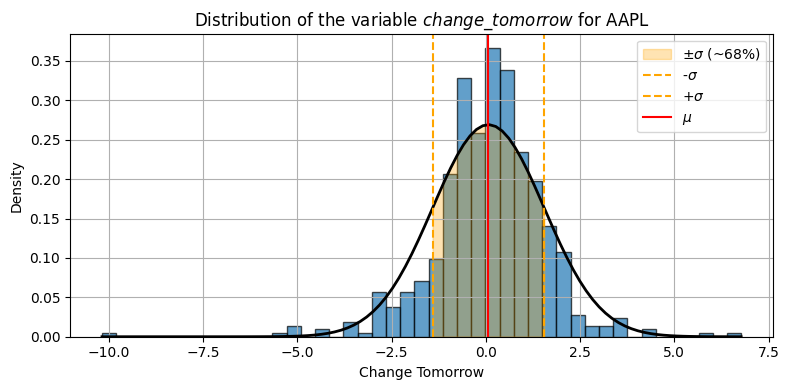

In [11]:
std = df.change_tomorrow.std()
mean = df.change_tomorrow.mean()

plt.figure(figsize=(8, 4))
count, bins, _ = plt.hist(df.change_tomorrow, bins=45, edgecolor='black', alpha=0.7, density=True)

# Normal curve
x = np.linspace(min(bins), max(bins), 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

# Fill ±1 std area
x_fill = np.linspace(mean - std, mean + std, 100)
plt.fill_between(x_fill, norm.pdf(x_fill, mean, std), alpha=0.3, color='orange', label=r'±$\sigma$ (~68%)')

# ±1σ markers
plt.axvline(mean - std, color='orange', linestyle='--', label=r'-$\sigma$')
plt.axvline(mean + std, color='orange', linestyle='--', label=r'+$\sigma$')
plt.axvline(mean, color='red', linestyle='-', label=r'$\mu$')

plt.title(r"Distribution of the variable $change\_tomorrow$ for AAPL")
plt.xlabel("Change Tomorrow")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

> Aabout **68% of the changes fall between -1.46 and +1.46**.

In [12]:
print(f"Standard Deviation (σ): {std:.4f}.")
print(f"Mean (μ): {mean:.4f}.")

Standard Deviation (σ): 1.4827.
Mean (μ): 0.0675.


---
#### IV. Long / Short

Did the stock go up or down?

In [13]:
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df.head(n=5)

Price,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500,1
2023-01-04,124.907707,127.181276,123.642420,125.431615,89113600,-1
2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700,1
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700,1
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800,1


---
#### V. Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library.

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier(max_depth=7, random_state=42)

y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

model.fit(X, y)
print(f"Decision Tree Accuracy: {model.score(X, y):.2%}.")

Decision Tree Accuracy: 83.89%.


---
#### VI. Backtesting

Create the strategy.

In [17]:
from backtesting import Strategy

In [18]:
class ClassificationAAPL(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

Run the Backtest.

In [19]:
from backtesting import Backtest

In [20]:
bt = Backtest(
    data=X,                      # The historical market data to run the backtest on
    strategy=ClassificationAAPL, # The trading strategy class to apply
    cash=10000,                  # Starting capital for the backtest
    commission=0.002,            # Commission fee per trade (0.2%)
    exclusive_orders=True        # Ensures only one order is active at a time (no overlapping trades)
)

In [21]:
results = bt.run()

---
#### VII. Report

Show the report in a DataFrame.

In [22]:
results.to_frame('Value').loc[:'Return [%]']

,Value
Start,2023-01-03 00:00:00
End,2025-04-03 00:00:00
Duration,821 days 00:00:00
Exposure Time [%],99.469027
Equity Final [$],54139.255828
Equity Peak [$],58531.782474
Commissions [$],21997.97133
Return [%],441.392558


Plot the backtest report.

In [23]:
bt.plot(filename='backtests/backtest_report_AAPL.html')

GridPlot(id='p1327', ...)